# Linear Coupling

Both Skew quadrupole and solenoid bring linear coupling to the two transverse plane. Solenoid is wildly used in low energy injector while skew quadrupole is used for high energy applications. 

## Hamiltonian with skew quadrupole error

For the skew quadrupole, the field reads:
\begin{align}
\Delta B_y+i\Delta B_x &= B_0 \Delta a_1 \left(-y+ix\right)
\end{align}

that can be derived from the vector potential:
\begin{align}
\Delta A_s &= B_0 \Delta a_1 xy
\end{align}

The corresponding Hamiltonian becomes:
\begin{align}
H=\frac{p_x^2}{2}+\frac{p_y^2}{2}+\left(\frac{1}{2\rho^2}+\frac{k(s)}{2} \right) x^2-\frac{k(s)}{2}y^2 - \frac{B_0 a_1}{B\rho} xy
\end{align}

For positive charge particles, the Hills equation becomes:
\begin{align}\label{eq:HillEqSQ}
x''+\left(\frac{1}{\rho^2}+k(s)\right)x&= \frac{B_0 \Delta a_1}{B\rho} y \equiv k_s y\\
y''-k(s)y&=\frac{B_0 \Delta a_1}{B\rho}x \equiv k_s x
\end{align}
where $k_s$ is the strenght of skew quadrupole.

Inside the skew quad, where the normal quad and dipole terms vanish, the diffential equation becomes:
\begin{align}
u''&=x''+y''=k_s(x+y)=k_su\\
v''&=x''-y''=k_s(y-x)=-k_sv
\end{align}

In a thin length approximation $$f_s=\lim_{l\to 0}\frac{1}{k_s l}$$
The matrix of a skew quadrupole simply reads as:
\begin{equation}
M_{sq}=\left[\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 1/f_{s} & 0\\
0 & 0 & 1 & 0\\
1/f_{s} & 0 & 0 & 1
\end{array}\right]
\end{equation}



## Hamiltonian with Solenoid

For a solenoid error $B_z$ along the z direction, the treatment has to be modified.  For the hard edge model of a solenoid of length $L$, centered at $s_0$:
\begin{align}
B_{z}(s)&=\begin{cases}
B_{0} & \left|s-s_{0}\right|\le L/2\\
0 & \left|s-s_{0}\right|>L/2
\end{cases}
\\
&=B_0 H\left(\frac{L}{2}-\left|s\right|\right)
\end{align}
Here, $H\left(\cdot\right)$ is the Heaviside Step Function.
The vector potential is 
\begin{align}
\mathbf A=\left(-\frac{B_z y}{2}, \frac{ B_z x}{2},0\right)
\end{align}
and vanishes outside the edge.

With the following approximations,
* Paraxial approximation
* Exact energy
The Hamiltonian gives:

\begin{align}
H&=\frac{1}{2}\left(\pi_x-\frac{e}{p_0}A_x\right)^2+\frac{1}{2}\left(\pi_y-\frac{e}{p_0}A_y\right)^2 \\
&=\frac{1}{2}\left(\pi_x+g(s)y\right)^2+\frac{1}{2}\left(\pi_y-g(s)x\right)^2
\end{align}

Here, we have defined the normalized solenoide field $$g(s)=g_sH\left(\frac{L}{2}-\left|s\right|\right)$$ and solenoid strength $g_s$: $$g_s=\frac{eB_0}{2p_0}$$,

Hamiltonian equation gives:
\begin{align}
\frac{dx}{ds}&=\frac{\partial H}{\partial \pi_x}=\pi_x+g(s)y\equiv x'\\
\frac{dy}{ds}&=\frac{\partial H}{\partial \pi_y}=\pi_y-g(s)x\equiv y'\\
\frac{d\pi_x}{ds}&=-\frac{\partial H}{\partial x}=g(s)p_y\\
\frac{d\pi_y}{ds}&=-\frac{\partial H}{\partial y}=-g(s)p_x
\end{align}

Or, we can explicitly write the equation for the particle's transverse momentum :

\begin{align}
\frac{dx}{ds}&=x'\label{eq:eomsol1}\\
\frac{dx'}{ds}&=2g(s)y'+g'(s)y\\
\frac{dy}{ds}&=y'\\
\frac{dy'}{ds}&=-2g(s)x'-g'(s)x\label{eq:eomsol2}
\end{align}





A common trick of the solving $\ref{eq:eomsol1}$ to $\ref{eq:eomsol2}$ is to define a complex variable $w=x+iy$, and its derivative with respect to $s$: $w' = x' + i y'$.  The equation of motion becomes 

\begin{align}
\frac{dw}{ds}&=w'\\
\frac{dw'}{ds}&=-2ig(s)w'-ig'(s)w \label{eq:eomsol_w}\\
\end{align}

The first term on the right-hand side of $\ref{eq:eomsol_w}$ indicates an oscillation of the complex variable $w$.  It hints us to separate the rotation part of the motion by defining:

\begin{align}
w(s)\equiv \tilde{w}(s)e^{i\theta(s)}
\end{align}

Therefore:

\begin{align}
w'(s)&= i\tilde{w}(s)e^{i\theta(s)}\theta '(s)+\tilde{w}'(s)e^{i\theta(s)}\\
w''(s)&= i\tilde{w}(s)e^{i\theta(s)}\theta ''(s)- \tilde{w}(s)e^{i\theta(s)}\theta '^2(s)+2i \tilde{w}'(s)e^{i\theta(s)}\theta '(s)+\tilde{w}''(s)e^{i\theta(s)}\label{eq:form_1}
\end{align}

On the other hand, from $\ref{eq:eomsol_w}$

\begin{align}
\frac{dw'}{ds}&=-2ig(s)w'-ig'(s)w \\
&=-2ig(s)\left(i\tilde{w}(s)e^{i\theta(s)}\theta '(s)+\tilde{w}'(s)e^{i\theta(s)}\right)-ig'(s)\tilde{w}(s)e^{i\theta(s)}\label{eq:form_2}
\end{align}

With trying to match Eq. $\ref{eq:form_1}$ and Eq. $\ref{eq:form_2}$, we can propose $\theta(s)=-\int_{-\infty}^s g(s')ds'$ .  Eq. $\ref{eq:form_1}$ and Eq. $\ref{eq:form_2}$ requires:   

\begin{align}
-i\tilde{w}(s)e^{i\theta(s)}g'(s)- \tilde{w}(s)e^{i\theta(s)}g^2(s)-2i \tilde{w}'(s)e^{i\theta(s)}g(s)+\tilde{w}''(s)e^{i\theta(s)} = -2ig(s)\left(-i\tilde{w}(s)e^{i\theta(s)}g(s)+\tilde{w}'(s)e^{i\theta(s)}\right)-ig'(s)\tilde{w}(s)e^{i\theta(s)}
\end{align}

which can be simplified to 

\begin{align}
\tilde{w}''(s)+g^2(s)\tilde{w}(s)=0
\end{align}

Therefore the dynamics under a solenoid field can be viewed, in an rotation frame with angle $\theta(s)=-\int_{-\infty}^s g(s')ds'$, to be a focusing element of both directions, with strength $g^2(s)$.




##  Linear Coupling Resonance In a Ring

We can now combine our discussion of perturbation of linear coupling resonance on the hill's equation with the regular linear terms.  From Eq. $\ref{eq:HillEqSQ}$ and Eq. $\ref{eq:eomsol1}$ to $\ref{eq:eomsol2}$
\begin{align}
&x''+\left(\frac{1}{\rho^2}+k(s)\right)x= k_s y + 2gy'+g'y\\
&y''-k(s)y= k_s x- 2gx'-g'x
\end{align}
which is derived from the Hamiltonian:
\begin{equation}\label{eq:lc_h}
H=\frac{1}{2}\left(\pi_x^2+\pi_y^2+K_x x^2+K_y y^2+g^2\left(x^2+y^2\right)\right)-k_sxy+\pi_xgy-\pi_ygx
\end{equation}
The first part is the unperturbed terms, contains the focusing from the normal quad, dipole and the focusing effect of the solenoid, the rest is the linear coupling potential.
\begin{equation}\label{eq:coupling_potential}
V_{lc}(x,y)=-k_sxy+\pi_xgy-\pi_ygx
\end{equation}




Using Floquet transformation, the 'coupling potential' can be expressed by the action-angle $(J_{x/y}, \psi{x/y})$ variable and expanded with Fourier transfromation with respect to the independent variable $\theta=s/R$:
\begin{align}\label{eq:floquet}
J_{x}&=\frac{1}{2\beta_x}\left[x^2+\left(\beta_x x'+\alpha_x x\right)^2\right]\\
\phi_x&=\psi_x - \int_0^s\frac{ds'}{\beta(s')} + \nu_x \theta
\end{align}
and similar treats applies to vertical direction.

Then inverse transformation can be used to replace the $(x,\pi_x,y,\pi_y)$ in the potential.  Then, consider the potential is a periodic funtion of the independent variable $\theta$, we can expand it as Fourier series:

\begin{equation}\label{eq:coupling_potential_fourier}
V_{lc}(\theta)=\sqrt{J_x J_y}\sum_l \left(G_{1,-1,l}e^{-i\left(\phi_x-\phi_y-l\theta+\chi_-\right)}+G_{1,1,l}e^{-i\left(\phi_x+\phi_y-l\theta+\chi_+\right)}+\text{c.c.}\right)
\end{equation}

|Resonances             | Name| Constant|
|----------             |-----|---------|
|$\nu_x-\nu_y=l$        |Diff. Resonance| $J_x+J_y$ |
|$\nu_x+\nu_y=l$        |Sum Resonance| $J_x-J_y$ |

Depend on the choice of the tune, one resonance may dominate over the other.  The potential can also be approximated by the corresponding term.  By changing the varible of introducing the new phase of the resonance phase, we can prove that the sum or difference of the action of two planes remains constant.

<IPython.core.display.Javascript object>


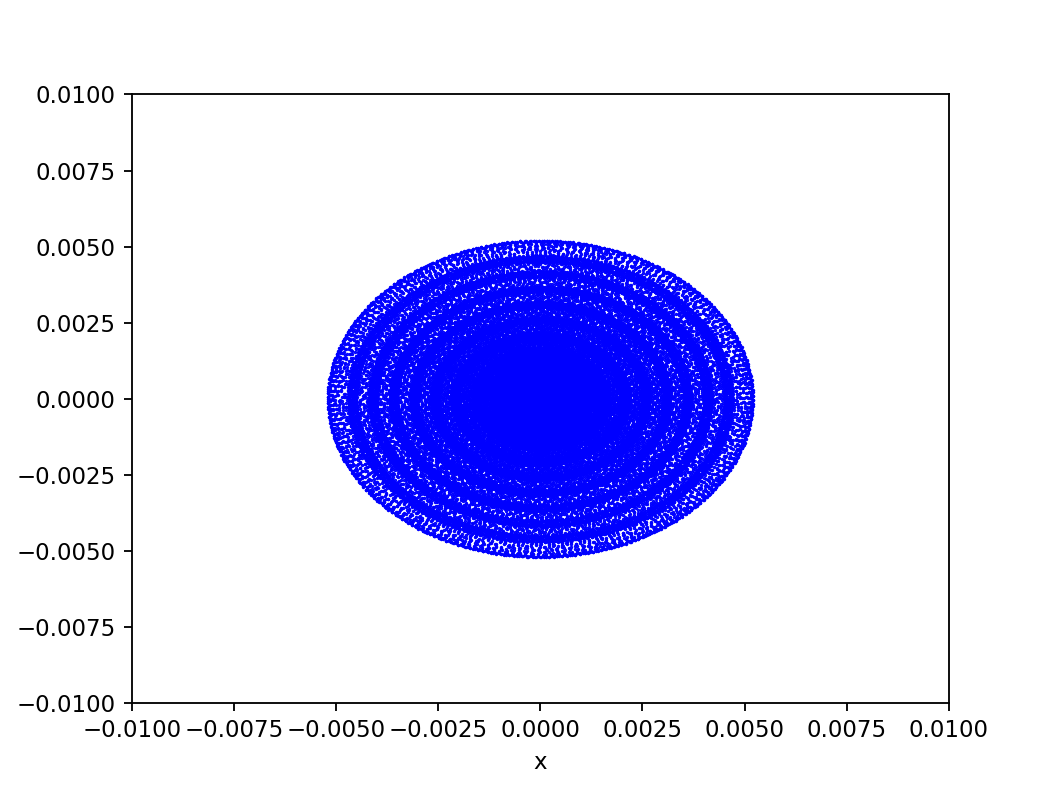

In [53]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib notebook

tunex=0.223
dtune=0.005
tuney= 1-tunex+dtune # Sum resonance
#tuney= tunex+dtune  # Diff resonance

pxs=0.0005*np.arange(10)
pxps=np.zeros_like(pxs)
#pxs=0.005*np.cos(np.linspace(0,np.pi, 10))
#pxps=0.005*np.sin(np.linspace(0,np.pi, 10))

particles=np.vstack([pxs,pxps])
xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0], tune=tunex, chrom=0.0, espr=0.0,
                  particles=particles)

pys=0.004*np.ones(10)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=tuney, chrom=0.0, espr=0.0,
          particles=particles, 
          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=5000


def evolve_func(turns, kick_turn_start=0, ks=-0.005,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]+=ks*ypy.coor2D[0,:]
            ypy.coor2D[1,:]+=ks*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        #avex,avep,sizex,sizep,emit=xpx.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        #emitlist.append(emit)
        yield xpx.coor2D, ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.01,0.01])
ax.set_ylim([-0.01,0.01])
xlist=[]
xplist=[]
ylist=[]
yplist=[]


for i in range(N_turn):
    arrx, arry=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arrx[0])
    xplist.append(arrx[1])
    ylist.append(arry[0])
    yplist.append(arry[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
yarr=np.vstack(ylist)
yparr=np.vstack(yplist)
ax.plot(xarr,xparr,linestyle='None', marker='.', c='b', markersize=1)
ax.set_xlabel('x')
Jx=xarr*xarr+xparr*xparr
Jy=yarr*yarr+yparr*yparr


<IPython.core.display.Javascript object>


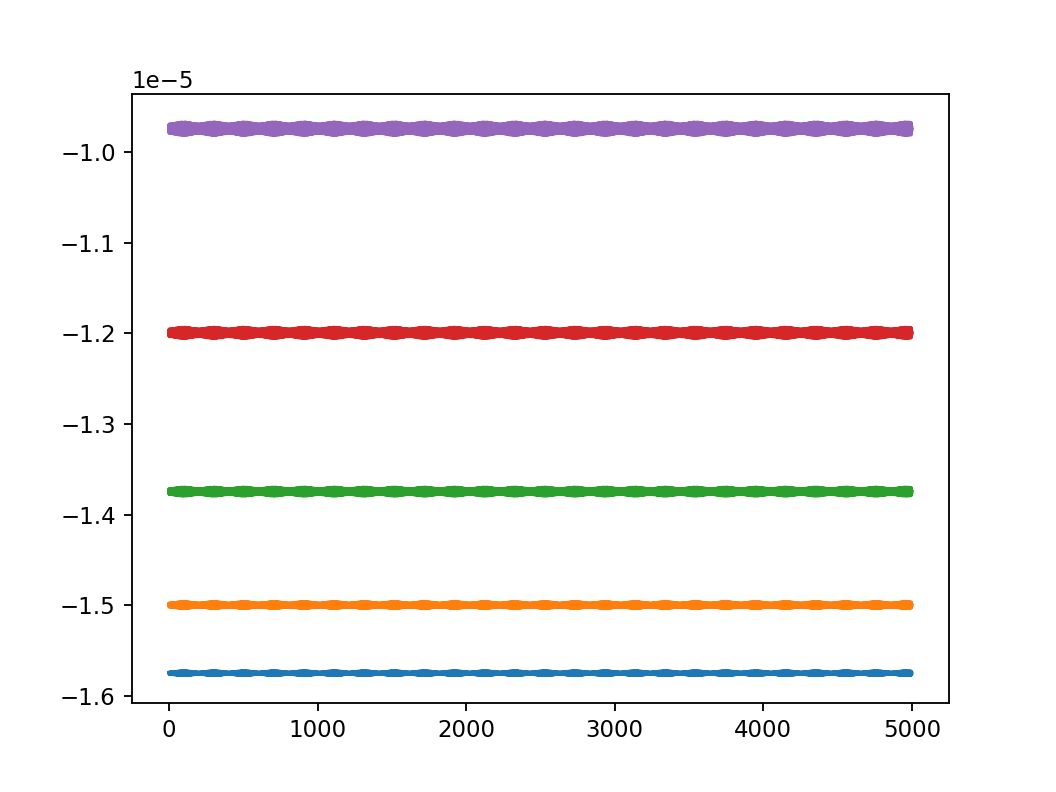

In [54]:
fig,ax=plt.subplots()
#ax.set_xlim([1000,15000])
for i in range(5):
    ax.plot(Jx[:,i+1]-Jy[:,i+1])
